Dane o ofertach pobrane ze strony: https://www.otomoto.pl/?category=motocykle-i-quady
Komenda do pobrania danych - poniżej w komentarzu (aby nie uruchamiać jej).
Dane z dnia 2019-04-19 już są pobrane do pliku ./scrapy_motory/motory.json

In [717]:
%matplotlib inline

In [718]:
# data pobrania danych - posłuży nam potem do przeliczalnia na PLN po kursie średnim sz tego dnia
data_pobrania_danych='2019-02-01'

In [719]:
#%%cmd
#cd scrapy_motory
#scrapy crawl motory -o motory.json

Wczytujemy dane z pliku JSON

In [720]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 60)
import json
import seaborn as sns
import numpy as np

with open('./scrapy_motory/motory.json') as plik_json:
    data = json.load(plik_json)
data[2]

{'Oferta od': 'Osoby prywatnej',
 'Kategoria': 'Motocykle',
 'Marka pojazdu': 'Kymco',
 'Model pojazdu': 'Inny',
 'Rok produkcji': '2017',
 'Przebieg': '5 400 km',
 'Pojemność skokowa': '125 cm3',
 'Moc': '15 KM',
 'Rodzaj napędu': 'Pas napędowy',
 'Typ Silnika': 'Czterosuwowy',
 'Rodzaj paliwa': 'Benzyna',
 'Skrzynia biegów': 'Automatyczna',
 'Typ': 'Skuter',
 'Kolor': 'Szary',
 'Metalik': 'Tak',
 'VAT marża': 'Tak',
 'Kraj pochodzenia': 'Francja',
 'Pierwszy właściciel': 'Tak',
 'Bezwypadkowy': 'Tak',
 'Stan': 'Używane',
 'Lokalizacja': 'Rąbień, gm. Aleksandrów Łódzki, zgierski, Łódzkie',
 'Link': 'https://www.otomoto.pl/oferta/kymco-kymco-125-xtown-2017-r-nowy-model-ID6BPzqv.html',
 'Cena': '11500',
 'Waluta': 'PLN'}

In [721]:
dane = pd.DataFrame.from_dict(data)

Wyświetlmy sobie nazwy kolumn i statystyki o danych

In [722]:
dane.columns

Index(['Bezwypadkowy', 'Cena', 'Faktura VAT', 'Kategoria', 'Kolor',
       'Kraj pochodzenia', 'Leasing', 'Liczba pozostałych rat', 'Link',
       'Lokalizacja', 'Marka pojazdu', 'Matowy', 'Metalik', 'Miesięczna rata',
       'Moc', 'Model pojazdu', 'Możliwość finansowania',
       'Numer rejestracyjny pojazdu', 'Oferta od', 'Opłata początkowa',
       'Perłowy', 'Pierwsza rejestracja', 'Pierwszy właściciel',
       'Pojemność skokowa', 'Przebieg', 'Rodzaj napędu', 'Rodzaj paliwa',
       'Rok produkcji', 'Serwisowany w ASO', 'Skrzynia biegów', 'Stan',
       'Tuning', 'Typ', 'Typ Silnika', 'Uszkodzony', 'VAT marża', 'VIN',
       'Waluta', 'Wartość wykupu', 'Zarejestrowany jako zabytek',
       'Zarejestrowany w Polsce'],
      dtype='object')

In [723]:
dane.dtypes

Bezwypadkowy                   object
Cena                           object
Faktura VAT                    object
Kategoria                      object
Kolor                          object
Kraj pochodzenia               object
Leasing                        object
Liczba pozostałych rat         object
Link                           object
Lokalizacja                    object
Marka pojazdu                  object
Matowy                         object
Metalik                        object
Miesięczna rata                object
Moc                            object
Model pojazdu                  object
Możliwość finansowania         object
Numer rejestracyjny pojazdu    object
Oferta od                      object
Opłata początkowa              object
Perłowy                        object
Pierwsza rejestracja           object
Pierwszy właściciel            object
Pojemność skokowa              object
Przebieg                       object
Rodzaj napędu                  object
Rodzaj paliw

In [724]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17574 entries, 0 to 17573
Data columns (total 41 columns):
Bezwypadkowy                   11086 non-null object
Cena                           17574 non-null object
Faktura VAT                    5947 non-null object
Kategoria                      17574 non-null object
Kolor                          17573 non-null object
Kraj pochodzenia               8781 non-null object
Leasing                        1775 non-null object
Liczba pozostałych rat         95 non-null object
Link                           17574 non-null object
Lokalizacja                    17574 non-null object
Marka pojazdu                  17574 non-null object
Matowy                         1450 non-null object
Metalik                        5977 non-null object
Miesięczna rata                95 non-null object
Moc                            11788 non-null object
Model pojazdu                  17485 non-null object
Możliwość finansowania         5389 non-null object
Nu

In [725]:
dane.describe()

,Bezwypadkowy,Cena,Faktura VAT,Kategoria,Kolor,Kraj pochodzenia,Leasing,Liczba pozostałych rat,Link,Lokalizacja,Marka pojazdu,Matowy,Metalik,Miesięczna rata,Moc,Model pojazdu,Możliwość finansowania,Numer rejestracyjny pojazdu,Oferta od,Opłata początkowa,Perłowy,Pierwsza rejestracja,Pierwszy właściciel,Pojemność skokowa,Przebieg,Rodzaj napędu,Rodzaj paliwa,Rok produkcji,Serwisowany w ASO,Skrzynia biegów,Stan,Tuning,Typ,Typ Silnika,Uszkodzony,VAT marża,VIN,Waluta,Wartość wykupu,Zarejestrowany jako zabytek,Zarejestrowany w Polsce
count,11086,17574,5947,17574,17573,8781,1775,95,17574,17574,17574,1450,5977,95,11788,17485,5389,658,17574,93,1804,2859,3445,15852,17573,13851,17574,17574,2811,12950,17574,665,17574,13339,390,3798,1926,17574,94,18,5308
unique,1,2072,1,1,14,25,1,14,17574,2648,124,1,1,88,246,696,1,652,2,86,1,2061,1,539,4640,3,3,79,1,4,2,1,10,3,1,1,1918,2,84,1,1
top,Tak,19900,Tak,Motocykle,Czarny,Polska,Tak,36,https://www.otomoto.pl/oferta/yamaha-yz-250-2t...,"ul. Wyzwolenia 408 B - 43-265 Mizerów, pszczyń...",Honda,Tak,Tak,823 PLN,15 KM,Inny,Tak,PGN66P5,Firmy,1 PLN,Tak,1 styczeń 2007,Tak,125 cm3,1 km,Łańcuch,Benzyna,2018,Tak,Manualna,Używane,Tak,Turystyczny,Czterosuwowy,Tak,Tak,00000000000000000,PLN,1 PLN,Tak,Tak
freq,11086,177,5947,17574,5044,3061,1775,41,1,333,2935,1450,5977,2,765,2096,5389,2,10649,3,1804,15,3445,2367,4794,7773,17407,2672,2811,9535,13465,665,3679,12528,390,3798,2,17459,3,18,5308


# Kolumny do usunięcia po wstępnej analizie :
|pole|dlaczego do skasowania|
------------ | -------------|
|**Kategoria**| wszystkie mają tę samą wartość: Motocykle|
| **Link**|link do oferty (pomocniczy), każda oferta ma unikalny link|
| **Numer rejestracyjny pojazdu**|każdy motor ma unikalny numer|
|**VIN**| każdy motor ma unikalny numer|
|**Bezwypadkowy**|60% ma wartość TAK, pozostale=brak danych (nie ma wartości NIE)- czyli w praktyce nie wiadomo czy zataił czy miał wypadek|
|**Pierwsza rejestracja**|W większości brak danych, jeśli jest, to zazwyczaj jest najdalej rok produkcji + 1| 


### Pozostałe kolumny związane z finansowaniem - nie mają znaczenia w naszej analizie:
Faktura VAT,Leasing,Liczba pozostałych rat,Miesięczna rata,Możliwość finansowania,Opłata początkowa,VAT marża,'Wartość wykupu<br>
**Kasujemy te kolumny**

In [726]:
skasuj_kolumny=[
    'Lokalizacja','Kategoria','Link','Numer rejestracyjny pojazdu','VIN','Bezwypadkowy','Pierwsza rejestracja',
    'Faktura VAT','Leasing','Liczba pozostałych rat','Miesięczna rata','Możliwość finansowania',
    'Opłata początkowa','VAT marża','Wartość wykupu'
]
dane.drop(columns=skasuj_kolumny, inplace=True)

In [727]:
dane.head()

,Cena,Kolor,Kraj pochodzenia,Marka pojazdu,Matowy,Metalik,Moc,Model pojazdu,Oferta od,Perłowy,Pierwszy właściciel,Pojemność skokowa,Przebieg,Rodzaj napędu,Rodzaj paliwa,Rok produkcji,Serwisowany w ASO,Skrzynia biegów,Stan,Tuning,Typ,Typ Silnika,Uszkodzony,Waluta,Zarejestrowany jako zabytek,Zarejestrowany w Polsce
0,6800,Niebieski,Niemcy,Suzuki,NaN,Tak,37 KM,XF,Firmy,NaN,NaN,680 cm3,60 000 km,Łańcuch,Benzyna,2000,NaN,Manualna,Używane,NaN,Enduro,Czterosuwowy,NaN,PLN,NaN,NaN
1,19500,Niebieski,Niemcy,Suzuki,NaN,Tak,98 KM,GSX,Osoby prywatnej,NaN,NaN,1 255 cm3,30 900 km,Łańcuch,Benzyna,2010,Tak,Manualna,Używane,NaN,Turystyczny,Czterosuwowy,NaN,PLN,NaN,NaN
2,11500,Szary,Francja,Kymco,NaN,Tak,15 KM,Inny,Osoby prywatnej,NaN,Tak,125 cm3,5 400 km,Pas napędowy,Benzyna,2017,NaN,Automatyczna,Używane,NaN,Skuter,Czterosuwowy,NaN,PLN,NaN,NaN
3,49000,Inny kolor,NaN,Harley-Davidson,NaN,Tak,NaN,Sportster,Firmy,NaN,NaN,1 202 cm3,1 km,Pas napędowy,Benzyna,2019,NaN,NaN,Nowe,NaN,Cruiser,Czterosuwowy,NaN,PLN,NaN,NaN
4,6900,Czarny,Niemcy,Honda,NaN,NaN,14 KM,CBR,Firmy,NaN,NaN,125 cm3,26 000 km,Łańcuch,Benzyna,2007,NaN,Manualna,Używane,NaN,Sportowy,NaN,NaN,PLN,NaN,Tak


In [728]:
print(dane.Cena.isnull().sum())
print(dane.Cena.dtype)

0
object


In [729]:
# Separatorem dziesiętnym w polu Cena jest przecinek - ustawimy locale aby odpowiednio to obsłużył
import locale
locale.setlocale(locale.LC_ALL,'pl_PL')

dane['Cena'] = pd.to_numeric(dane['Cena'], errors='coerce')
# Kasujemy wiersze które nie mają ceny
dane.drop(dane[dane['Cena'].isnull()].index,axis=0,inplace=True)

# Analizujemy pole Waluta - są pojazdy w innych walutach, więc przeliczamy je na PLN po kursie średnim NBP z daty ściągnięcia danych ze strony 
Uwaga - jeśli będzie błąd pobrania danych z NB to proszę zmienić parametr `data_pobrania_danych` <br>
na +/1-2 dni bo być może w tej dacie nie ma tabeli kursów NBP

In [730]:
dane.groupby('Waluta').size()

Waluta
EUR      115
PLN    17447
dtype: int64

In [731]:
import requests
import json

def pobierz_kurs_sredni_nbp(data,waluta):
    """Pobiera kurs średni NBP dla podanej daty (format daty: yyyy-mm-dd) oraz kodu waluty (np. EUR)"""
    NBP_URL = f'http://api.nbp.pl/api/exchangerates/rates/A/{waluta}/{data}/'
    response = requests.get(NBP_URL)
    if(response.ok):
        api_data = json.loads(response.content)
        return api_data['rates'][0]['mid']
    else:
        response.raise_for_status()

# test pobrania kursu
pobierz_kurs_sredni_nbp(data_pobrania_danych,'EUR')

4.2706

In [732]:
# Cena - zamiana przecinka dziesiętnego na kropkę, a potem na INT
# dane['Cena'] = dane['Cena'].str.replace(',','.')
# dane['Cena'] = dane['Cena'].astype(float).astype(int)

In [733]:
dane.sample()

,Cena,Kolor,Kraj pochodzenia,Marka pojazdu,Matowy,Metalik,Moc,Model pojazdu,Oferta od,Perłowy,Pierwszy właściciel,Pojemność skokowa,Przebieg,Rodzaj napędu,Rodzaj paliwa,Rok produkcji,Serwisowany w ASO,Skrzynia biegów,Stan,Tuning,Typ,Typ Silnika,Uszkodzony,Waluta,Zarejestrowany jako zabytek,Zarejestrowany w Polsce
1777,7900.0,Niebieski,NaN,Yamaha,NaN,NaN,NaN,PW,Firmy,NaN,NaN,49 cm3,1 km,NaN,Benzyna,2019,NaN,NaN,Używane,NaN,Motorower,Dwusuwowy,NaN,PLN,NaN,NaN


#### Sprawdzamy jakie mamy waluty w zbiorze danych

In [734]:
dane.groupby('Waluta').count()

,Cena,Kolor,Kraj pochodzenia,Marka pojazdu,Matowy,Metalik,Moc,Model pojazdu,Oferta od,Perłowy,Pierwszy właściciel,Pojemność skokowa,Przebieg,Rodzaj napędu,Rodzaj paliwa,Rok produkcji,Serwisowany w ASO,Skrzynia biegów,Stan,Tuning,Typ,Typ Silnika,Uszkodzony,Zarejestrowany jako zabytek,Zarejestrowany w Polsce
Waluta,,,,,,,,,,,,,,,,,,,,,,,,,
EUR,115,115,69,115,1,0,24,115,115,0,0,109,115,36,115,115,1,37,115,0,115,41,0,0,0
PLN,17447,17446,8707,17447,1449,5976,11752,17358,17447,1803,3444,15731,17446,13807,17447,17447,2808,12901,17447,665,17447,13286,390,18,5304


In [735]:
# dla każdej waluty innej niż PLN przeliczamy na PLN
for waluta in dane['Waluta'].unique():
    if waluta=='PLN':
        continue
    kurs = pobierz_kurs_sredni_nbp(data_pobrania_danych,waluta)
    print(waluta,kurs)
    dane.loc[ dane['Waluta']==waluta ,'Cena'] *= kurs
    dane.loc[ dane['Waluta']==waluta ,'Waluta'] = 'PLN'

EUR 4.2706


#### Sprawdzamy po przeliczeniu ceny po kursach walut jakie zostały nam waluty, i pole Waluta kasujemy - bo są tylko PLN

In [736]:
print(dane.Waluta.unique())
dane.drop(columns='Waluta', inplace=True)

['PLN']


# Pojazdy uszkodzone i zabytkowe - kasujemy
#### Kasujemy pojazdy uszkodzone (390 pozycji), a potem kolumnę "Uszkodzony"
ceny pojazdów uszkodzonych mogą się znacznie różnić zależnie od rodzaju uszkodzenia (np. ten sam model z lekkim otarciem lakieru vs. rozwalonym silnikiem - ceny będą diametralnie różnie), więc są niereprezentatywne i będą źle wpływać na model
#### Kasujemy pojazdy zabytkowe (18 pozycji) oraz kolumnę"Zarejestrowany jako zabytek"
wycena pojazdów zabytkowych może być przez rzeczoznawcę wykonana, nie przez komputer <br>
jest ich bardzo mało w zbiorze danych, zależnie od stanu zabytku jego cena może być bardzo różna

In [737]:
print(f'Kasujemy pojazdy uszkodzone = {len(dane[dane.Uszkodzony=="Tak"])} szt.')
print(f'Kasujemy pojazdy zabytkowe = {len(dane[dane["Zarejestrowany jako zabytek"]=="Tak"])} szt.')

dane.drop(dane[dane.Uszkodzony=='Tak'].index, axis=0, inplace=True )
dane.drop(dane[dane['Zarejestrowany jako zabytek']=="Tak"].index, axis=0, inplace=True )
dane.drop(columns=['Uszkodzony','Zarejestrowany jako zabytek'],inplace=True)

Kasujemy pojazdy uszkodzone = 390 szt.
Kasujemy pojazdy zabytkowe = 18 szt.


### Kolumny: 'Matowy','Metalik','Perłowy','Pierwszy właściciel','Serwisowany w ASO','Tuning'

In [738]:
kolumny=['Matowy','Metalik','Perłowy','Pierwszy właściciel','Serwisowany w ASO','Tuning']
for kolumna in kolumny:
    print(kolumna, dane[kolumna].unique())

Matowy [nan 'Tak']
Metalik ['Tak' nan]
Perłowy [nan 'Tak']
Pierwszy właściciel [nan 'Tak']
Serwisowany w ASO [nan 'Tak']
Tuning [nan 'Tak']


mają tyko wartość TAK lub puste - zamieniamy wartości na: Tak-1, puste=0

In [739]:
for kolumna in kolumny:
    dane[kolumna].fillna(0,inplace=True)
    dane.loc[dane[kolumna]!=0, kolumna]=1
    print(kolumna, dane[kolumna].unique(), dane[kolumna].dtype)

Matowy [0 1] int64
Metalik [1 0] int64
Perłowy [0 1] int64
Pierwszy właściciel [0 1] int64
Serwisowany w ASO [0 1] int64
Tuning [0 1] int64


## Czyścimy pole "Pojemność skokowa" - kasujemy spacje i przyrostek "cm3"

In [740]:
dane['Pojemność skokowa'].head()

0      680 cm3
1    1 255 cm3
2      125 cm3
3    1 202 cm3
4      125 cm3
Name: Pojemność skokowa, dtype: object

In [741]:
dane['Pojemność skokowa'] = dane['Pojemność skokowa'].str.replace('cm3','')
dane['Pojemność skokowa'] = dane['Pojemność skokowa'].str.replace(' ','')
dane['Pojemność skokowa'].astype(float)

dane['Pojemność skokowa'].isna().sum()

1708

#### Sprawdzimy sobie wartości odstające w polu 'Pojemność skokowa'
powinny się mieścić gdzieś do powiedzmy do max. 3000cm3 (silnik większy to już prawdiwy smok)

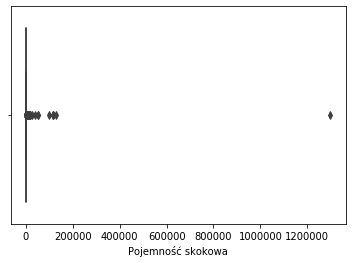

In [742]:
dane['Pojemność skokowa'] = dane['Pojemność skokowa'].astype(float)

pojemnosc = dane['Pojemność skokowa']
pojemnosc=pojemnosc.ffill().bfill()

sns.boxplot(x=pojemnosc)

#### zerujemy pozycje o nienormalnej pojemności skokowej (powyżej 3 litrów - takich silnikw w motorach nie ma)

In [743]:
dane.loc[dane['Pojemność skokowa'] > 3000, 'Pojemność skokowa'] = np.nan
dane[dane['Pojemność skokowa'] > 3000]['Pojemność skokowa'].count()

0

#### pozostałe puste ustawiamy na średnią

In [744]:
dane.loc[dane['Pojemność skokowa'].isnull(),'Pojemność skokowa'] = np.trunc(dane['Pojemność skokowa'].mean())

#### Po tej operacji pojemności skokowe wyglądają w miarę realistycznie

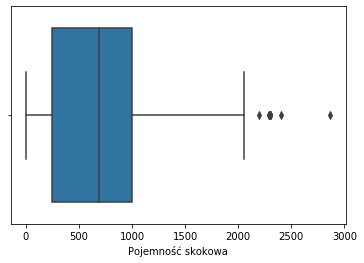

In [745]:
sns.boxplot(x=dane['Pojemność skokowa'])

## Czyścimy pole "Przebieg" - kasujemy spacje i przyrostek "km"

In [746]:
dane['Przebieg'] = dane['Przebieg'].str.replace('km','')
dane['Przebieg'] = dane['Przebieg'].str.replace(' ','')
dane['Przebieg']=dane['Przebieg'].astype(float)

In [747]:
dane['Przebieg'].isna().sum()

1

#### Jeden rekord nie ma podanego przebiegu - kasujemy ten rekord

In [748]:
dane.drop(dane[dane['Przebieg'].isnull()].index,axis=0,inplace=True)

In [749]:
dane['Moc'].head()

0    37 KM
1    98 KM
2    15 KM
3      NaN
4    14 KM
Name: Moc, dtype: object

In [750]:
dane['Moc'] = dane['Moc'].str.replace('KM','')
dane['Moc'] = dane['Moc'].str.replace(' ','')
dane['Moc']=dane['Moc'].astype(float)

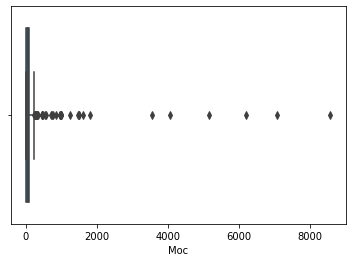

In [751]:
sns.boxplot(x=dane['Moc'])

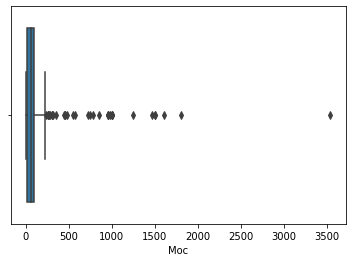

In [752]:
# moce powyżej 1000~2000KM są dla motorów nieprawdopodobne
# sprawdźmy jeszcze zakres < 4000
sns.boxplot(x=dane.loc[dane['Moc']<4000,'Moc'])

### Decyzja - należy skasować moce > 2000 KM i przypisać im średnią

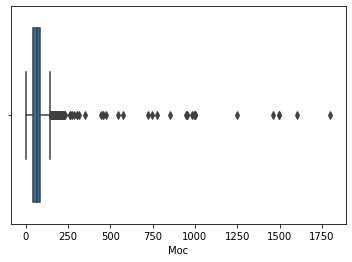

In [753]:
dane.loc[dane['Moc'] > 2000, 'Moc'] = np.nan
dane.loc[dane['Moc'].isnull(),'Moc'] = np.trunc(dane['Moc'].mean())
sns.boxplot(x=dane['Moc'])

# Pole 'Kolor'

Czarny        4878
Inny kolor    2384
Niebieski     1882
Czerwony      1865
Biały         1816
Srebrny       1109
Szary         1023
Zielony        748
Bordowy        604
Żółty          356
Brązowy        194
Złoty          141
Fioletowy       78
Beżowy          75
Name: Kolor, dtype: int64


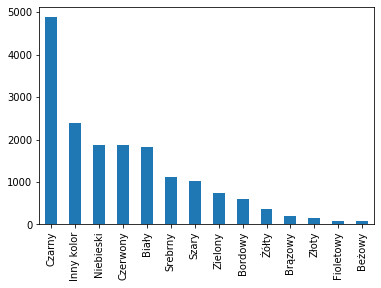

In [754]:
dane.Kolor = dane.Kolor.astype(str)
dane.Kolor.value_counts().plot('bar')
print(dane.Kolor.value_counts())

#### Zróbmy słownik dopuszczalnych kolorów dla których mamy > 100 ofert. 
Pozostałe kolory oraz NAN zamienimy na "Inny kolor"

In [755]:
tmp = dane.Kolor.value_counts()
dopuszczalne_kolory = tmp[tmp>100].index

In [756]:
dopuszczalne_kolory

Index(['Czarny', 'Inny kolor', 'Niebieski', 'Czerwony', 'Biały', 'Srebrny',
       'Szary', 'Zielony', 'Bordowy', 'Żółty', 'Brązowy', 'Złoty'],
      dtype='object')

In [757]:
# zamiana kolorów
dane.loc[~dane['Kolor'].isin(dopuszczalne_kolory),'Kolor'] = 'Inny kolor'

In [758]:
dane['Kolor'].unique()

array(['Niebieski', 'Szary', 'Inny kolor', 'Czarny', 'Biały', 'Zielony',
       'Bordowy', 'Srebrny', 'Czerwony', 'Żółty', 'Złoty', 'Brązowy'],
      dtype=object)

## Pole 'Kraj pochodzenia' - kasujemy, bo jest 8633 wartosci NaN'

In [759]:
dane['Kraj pochodzenia'].value_counts(dropna=False)

NaN                  8632
Polska               3046
Niemcy               1581
Stany Zjednoczone    1156
Francja               680
Włochy                568
Szwajcaria            366
Inny                  230
Belgia                193
Holandia              188
Wielka Brytania       177
Kanada                166
Austria                71
Szwecja                54
Hiszpania              14
Dania                   7
Irlandia                5
Czechy                  3
Finlandia               3
Ukraina                 3
Rosja                   3
Norwegia                2
Luksemburg              2
Liechtenstein           1
Bułgaria                1
Słowenia                1
Name: Kraj pochodzenia, dtype: int64

In [760]:
dane.drop(columns='Kraj pochodzenia', inplace=True)

## Pole ''Skrzynia biegów' - kasujemy, bo jest 4511 wartosci NaN'

In [761]:
dane['Skrzynia biegów'].value_counts(dropna=False)

Manualna           9274
NaN                4510
Automatyczna       2370
Bezstopniowa        765
Półautomatyczna     234
Name: Skrzynia biegów, dtype: int64

In [762]:
dane.drop(columns='Skrzynia biegów', inplace=True)

## Pole 'Zarejestrowany w Polsce' - kasujemy, bo 75% wartosci NaN'

In [763]:
dane['Zarejestrowany w Polsce'].value_counts(dropna=False)

NaN    11902
Tak     5251
Name: Zarejestrowany w Polsce, dtype: int64

In [764]:
dane.drop(columns='Zarejestrowany w Polsce', inplace=True)

## Pole 'Rodzaj paliwa' - kasujemy, praktycznie 99,9% to "Benzyna"

In [765]:
dane['Rodzaj paliwa'].value_counts(dropna=False)

Benzyna        16988
Elektryczny      144
Diesel            21
Name: Rodzaj paliwa, dtype: int64

In [766]:
dane.drop(columns='Rodzaj paliwa', inplace=True)

## Pole 'Stan' - ma 2 kategorie, , zamieniamy na cyfry 0-Nowe/1-Używane

In [767]:
dane['Stan'].value_counts(dropna=False)

Używane    13052
Nowe        4101
Name: Stan, dtype: int64

In [769]:
dane['Stan'].replace({'Nowe':'0','Używane':'1'},inplace=True)
dane['Stan']=dane['Stan'].astype(int)
dane['Stan'].value_counts(dropna=False)

1    13052
0     4101
Name: Stan, dtype: int64

## Pole 'Oferta od' - ma 2 kategorie, zamieniamy na cyfry 0/1 wg słownika

In [ ]:
dane['Oferta od'].value_counts(dropna=False)

In [ ]:
slownik_dla_oferta_od = {symbol: numer for numer, symbol in enumerate(dane['Oferta od'].unique())}
slownik_dla_oferta_od

In [ ]:
dane.replace({'Oferta od': slownik_dla_oferta_od},inplace=True)

In [ ]:
dane.head()

Marka pojazdu
Model pojazdu


Rodzaj napędu
Rok produkcji
Typ
Typ Silnika


Pojemność skokowa (skalowanie)
Przebieg (skalowanie)
Moc (skalowanie)

In [772]:
dane['Typ'].value_counts(dropna=False)

Turystyczny    3608
Chopper        2348
Skuter         2287
Naked          2137
Sportowy       2036
Quad           1612
Cruiser        1124
Enduro         1089
Krosowy         620
Motorower       292
Name: Typ, dtype: int64